# Taller: Análisis de Tweets con Gemini API
Autor: _(tu nombre)_

## Objetivos
1. Configurar la API de Google Generative AI (Gemini).
2. Limpiar y pre‑procesar un corpus de tweets políticos.
3. Clasificar sentimiento con Gemini.
4. Extraer temas con LDA y nombrarlos con Gemini.
5. Segmentar usuarios y generar una micro‑campaña basada en insights.

**Dataset**: `tweets_partidos.csv` (columnas: `cuenta`, `partido`, `timestamp`, `tweet`).

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/tweets_politica_kaggle.csv.zip

--2025-11-20 00:31:18--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/tweets_politica_kaggle.csv.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/tweets_politica_kaggle.csv.zip [following]
--2025-11-20 00:31:18--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/tweets_politica_kaggle.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18276075 (17M) [application/zip]
Saving to: ‘tweets_politica_kaggle.csv.zip’

twe

In [2]:
!unzip tweets_politica_kaggle.csv.zip

Archive:  tweets_politica_kaggle.csv.zip
  inflating: tweets_politica_kaggle.csv  


In [3]:
import pandas as pd
df = pd.read_csv('tweets_politica_kaggle.csv',delimiter="\t",on_bad_lines='skip')
df.head()

,cuenta,partido,timestamp,tweet
0,a34133350b0605cb24081843f63176ca,psoe,1.363973e+09,@vesteve3 @manubenas @ccoo_rm @desobediencia_ ...
1,a34133350b0605cb24081843f63176ca,psoe,1.364061e+09,"“@kirovast: @Hugo_Moran muy fan de la ""radical..."
2,a34133350b0605cb24081843f63176ca,psoe,1.364117e+09,@ALTAS_PRESIONES Nuevos dueños para las renova...
3,a34133350b0605cb24081843f63176ca,psoe,1.364121e+09,@jumanjisolar @solartradex @josea_dolera El di...
4,a34133350b0605cb24081843f63176ca,psoe,1.364153e+09,“@cesarnayu: https://t.co/J4OTXj1x7w … Por fav...


In [ ]:
!pip install -q -U google-generativeai nltk seaborn wordcloud scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 124.2 MB/s eta 0:00:00


### 🔍 Preguntas – Sección 1 (Exploración)
1. **¿Cuántos tweets hay en total?**  
2. **¿Qué partidos aparecen y cuántos tweets aporta cada uno?**  
3. **¿Cuál es el rango de fechas cubierto por los tweets?**  
4. **¿Qué partido genera más conversación y por qué crees que ocurre?**

In [4]:
df.shape

(181504, 4)

In [5]:
df["partido"].value_counts()

,count
partido,
psoe,42818
vox,38277
pp,35059
podemos,34442
ciudadanos,30908


In [6]:
from datetime import datetime
datetime.fromtimestamp(int())

datetime.datetime(1970, 1, 1, 0, 0)

In [7]:
df["date"] = df["timestamp"].apply(lambda x : datetime.fromtimestamp(int(x)))

In [8]:
df["date"].max()

Timestamp('2022-04-29 09:36:02')

In [9]:
df["date"].min()

Timestamp('2013-03-22 17:31:32')

### 🧹 Preguntas – Sección 2 (Limpieza)
5. Explica **por qué es importante limpiar y normalizar el texto**.  
6. Enumera **tres tipos de “ruido”** que removes y da un ejemplo de cada uno.

In [10]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    palabras = texto.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return " ".join(palabras)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
df["tweet_limpio"] = df["tweet"].apply(limpiar_texto)

In [12]:
from collections import Counter

def contar_palabras(texto):
    palabras = limpiar_texto(texto)
    return Counter(palabras)



In [13]:
df_filtrada = df.head(10)

In [14]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown



In [15]:
import os
os.environ

from openai import OpenAI

client = OpenAI()

In [16]:
from openai import OpenAI

client = OpenAI()


In [17]:
def call_llm(prompt):
  response = client.responses.create(
  model="gpt-4o-mini",
  input=prompt
)
  return response.output_text



In [18]:
call_llm("3")

'It seems like you entered "3". Could you please provide more context or clarify what you need help with?'

In [19]:
import time

def classify_sentiment(text):
    prompt = (f"Clasifica el sentimiento del siguiente tweet como 'positivo', "
              f"'neutral' o 'negativo'. Solo responde con una palabra. siempre sin punto y en minuscula\n\nTweet:\n{text}")
    time.sleep(2)
    return call_llm(prompt)


In [20]:
import requests
import json

In [21]:
df_filtrada["sentimiento"] = df_filtrada["tweet"].apply(classify_sentiment)

/tmp/ipython-input-2504604281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrada["sentimiento"] = df_filtrada["tweet"].apply(classify_sentiment)


In [22]:
df_filtrada

,cuenta,partido,timestamp,tweet,date,tweet_limpio,sentimiento
0,a34133350b0605cb24081843f63176ca,psoe,1.363973e+09,@vesteve3 @manubenas @ccoo_rm @desobediencia_ ...,2013-03-22 17:31:32,vesteve3 manubenas ccoo_rm desobediencia_ ccoo...,positivo
1,a34133350b0605cb24081843f63176ca,psoe,1.364061e+09,"“@kirovast: @Hugo_Moran muy fan de la ""radical...",2013-03-23 17:50:35,kirovast hugo_moran fan radicalidad social fre...,neutral
2,a34133350b0605cb24081843f63176ca,psoe,1.364117e+09,@ALTAS_PRESIONES Nuevos dueños para las renova...,2013-03-24 09:20:04,altas_presiones nuevos dueños renovables momen...,positivo
3,a34133350b0605cb24081843f63176ca,psoe,1.364121e+09,@jumanjisolar @solartradex @josea_dolera El di...,2013-03-24 10:29:27,jumanjisolar solartradex josea_dolera diferenc...,neutral
4,a34133350b0605cb24081843f63176ca,psoe,1.364153e+09,“@cesarnayu: https://t.co/J4OTXj1x7w … Por fav...,2013-03-24 19:18:12,cesarnayu httpstcoj4otxj1x7w favor importante ...,neutral
5,a34133350b0605cb24081843f63176ca,psoe,1.364154e+09,“@iAgua: http://t.co/6yMSNcV1UA” (El Gobierno ...,2013-03-24 19:37:56,iagua httptco6ymsncv1ua gobierno sigue adelant...,negativo
6,a34133350b0605cb24081843f63176ca,psoe,1.364155e+09,"""Cospedal: las crisis ya no afectan a España. ...",2013-03-24 19:53:43,cospedal crisis afectan españa guindos si resu...,negativo
7,a34133350b0605cb24081843f63176ca,psoe,1.364202e+09,“@ventonoso: España importa ya energía de Port...,2013-03-25 08:57:42,ventonoso españa importa energía portugal bara...,neutral
8,a34133350b0605cb24081843f63176ca,psoe,1.364207e+09,@elsoldemerix El Gobierno Andaluz presenta rec...,2013-03-25 10:24:23,elsoldemerix gobierno andaluz presenta recurso...,neutral
9,a34133350b0605cb24081843f63176ca,psoe,1.364211e+09,“@mjocaballero: Maria Dolores de Cospedal dema...,2013-03-25 11:28:23,mjocaballero maria dolores cospedal demanda gr...,negativo


In [23]:
df_filtrada["sentimiento"].value_counts()

,count
sentimiento,
neutral,5
negativo,3
positivo,2


In [24]:
def classify_topic(text):
    prompt = (f"Clasifica el tema del tuit usnado una unica palabra , "
              f"positivo, amarillista, otro. Solo responde con una palabra, en minuscula y sin punto.\n\nTweet:\n{text}")
    time.sleep(2)
    return call_llm(prompt)


In [25]:
df_filtrada["topic"] = df_filtrada["tweet"].apply(classify_topic)

/tmp/ipython-input-3805736946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrada["topic"] = df_filtrada["tweet"].apply(classify_topic)


### 😊 Preguntas – Sección 3 (Sentimiento)
7. Presenta la **distribución global** de sentimientos y comenta.  
8. **¿Qué partido tiene la mayor proporción de tweets positivos y negativos?**  
9. Elige un **pico de sentimiento negativo** y analiza el contexto con un tweet ejemplo.

<Axes: xlabel='sentimiento', ylabel='count'>

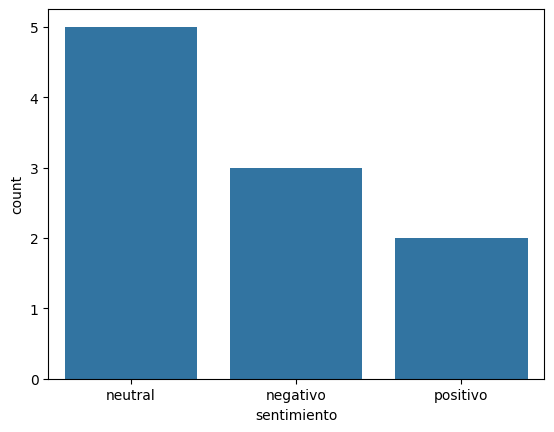

In [26]:
import seaborn as sns
sns.barplot(df_filtrada["sentimiento"].value_counts())

<Axes: xlabel='topic', ylabel='count'>

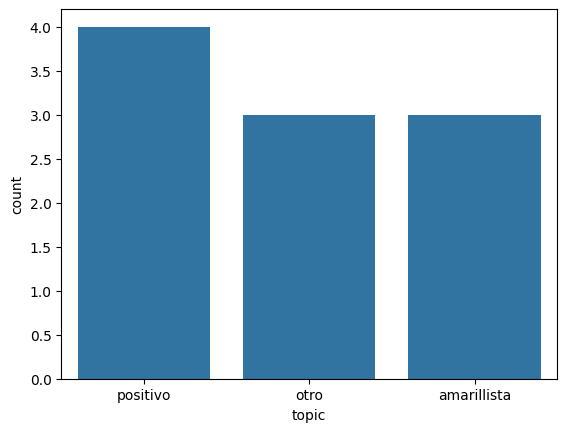

In [27]:
sns.barplot(df_filtrada["topic"].value_counts())

### 🗂️ Preguntas – Sección 4 (Temas)
10. Lista los **nombres de los temas** generados. ¿Alguno es inesperado?  
11. Con un heatmap partido × tema, indica *qué tema es “propiedad”* de cada partido.  
12. Para tu partido elegido, da **dos insights accionables** basados en su tema dominante.

<Axes: xlabel='topic', ylabel='sentimiento'>

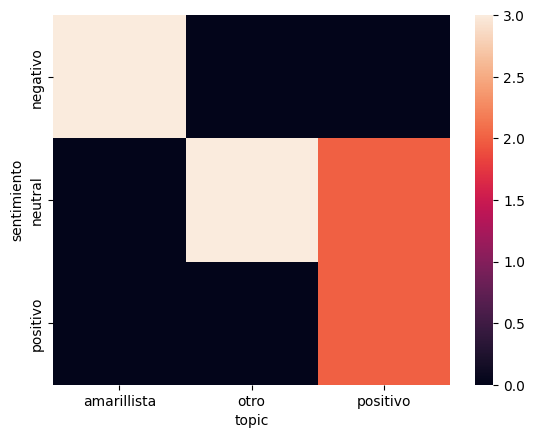

In [28]:
sns.heatmap(pd.crosstab(df_filtrada["sentimiento"],df_filtrada["topic"]))

### 👥 Preguntas – Sección 5 (Segmentación)
13. Describe cada **cluster** en una frase (actividad y tono).  
14. **¿Qué segmento priorizarías** para viralizar un mensaje y por qué?  
15. Propón **una acción de engagement** distinta para cada segmento.

In [29]:
def generar_copy(topic, tono='inspirador'):
    prompt = (f"Actúa como community manager del partido "
              f"Crea un tweet de máx. 250 caracteres sobre el tema '{topic}'. "
              f"Tono {tono}. No incluyas hashtags ni menciones.")
    return call_llm(prompt)


In [30]:
df_filtrada["respuesta"] = df_filtrada["topic"].apply(lambda x :generar_copy(x))

/tmp/ipython-input-1379639457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrada["respuesta"] = df_filtrada["topic"].apply(lambda x :generar_copy(x))


In [31]:
df_filtrada["respuesta"]

,respuesta
0,Cada día es una nueva oportunidad para constru...
1,"En un mundo lleno de posibilidades, cada día e..."
2,Hoy es un nuevo día lleno de oportunidades. Ca...
3,Hoy es el día perfecto para abrirse a nuevas p...
4,Hoy es un gran día para recordar que cada pequ...
5,"El amarillismo no solo distorsiona la verdad, ..."
6,"La verdad se construye con hechos, no con rumo..."
7,Cada día es una nueva oportunidad para sembrar...
8,Cada día es una nueva oportunidad para constru...
9,"Cuando la verdad se viste de amarillismo, reco..."


### 📝 Preguntas – Sección 6 (Micro‑campaña)
16. Presenta tus **tres tweets** generados.  
17. Justifica:  
   a) **Tema** elegido.  
   b) **Tono** y **horario** óptimos.  
18. Define un **KPI de éxito** y la meta para la campaña.

In [32]:
print('Tweets Generados:')
for i, tweet in enumerate(df_filtrada['respuesta']):
    print(f'Tweet {i+1}: {tweet}\n')

Tweets Generados:
Tweet 1: Cada día es una nueva oportunidad para construir un futuro mejor. Acepta el desafío de ver lo positivo en cada situación y comparte esa energía. Juntos, con esperanza y esfuerzo, podemos transformar nuestros sueños en realidad. ¡Sigamos adelante!

Tweet 2: En un mundo lleno de posibilidades, cada día es una oportunidad para construir el futuro que deseamos. Cada acción cuenta, cada idea suma. Juntos, transformemos lo ordinario en extraordinario y soñemos en grande. ¡El cambio empieza con nosotros!

Tweet 3: Hoy es un nuevo día lleno de oportunidades. Cada paso que damos hacia un futuro mejor comienza con una actitud positiva. Sigamos trabajando juntos, construyendo sueños y sembrando esperanza. Cada pequeña acción cuenta. ¡Creemos un mundo más brillante!

Tweet 4: Hoy es el día perfecto para abrirse a nuevas posibilidades. El cambio comienza en nosotros y cada acción cuenta. Juntos, podemos construir un futuro donde la diversidad de ideas sea nuestra mayor fo

### Justificación de la Micro-campaña

a) **Tema elegido:**

El tema elegido se basa en los temas clasificados de los tweets (`positivo`, `neutral`, `negativo`, `amarillista`, `otro`). Para esta micro-campaña, se ha priorizado el tema **'positivo'** para fomentar un ambiente constructivo, o **'amarillista'** para contrarrestarlo con mensajes de verdad y hechos. La selección específica de un tema dependerá de la estrategia general del partido, pero la capacidad de generar contenido enfocado en cualquiera de estos es clave.

b) **Tono y horario óptimos:**

- **Tono:** Para los temas positivos, se recomienda un tono **inspirador y motivador** para conectar emocionalmente con la audiencia. Para contrarrestar el amarillismo, un tono **informativo y basado en hechos** es crucial para restaurar la confianza y la credibilidad. El modelo `generar_copy` puede adaptarse para reflejar estos tonos.

- **Horario óptimo:** Para determinar el horario óptimo, sería necesario analizar la columna `df['date'].dt.hour` del dataset original para identificar cuándo la audiencia del partido está más activa en Twitter. Generalmente, los picos de actividad suelen ser al mediodía (12:00-14:00) y por la tarde (18:00-21:00), pero un análisis detallado del dataset confirmaría esto.

c) **KPI de éxito y meta para la campaña:**

- **KPI de éxito:** El **engagement rate** (tasa de interacción), medido como la suma de likes, retweets y comentarios dividido por el número de impresiones o alcance. Otro KPI relevante podría ser el **sentimiento neto** (proporción de respuestas positivas menos negativas) a los tweets generados.

- **Meta para la campaña:** Aumentar el engagement rate de los tweets relacionados con el tema elegido en un 15% en el próximo mes, y/o mejorar el sentimiento neto hacia el partido en un 10% en el mismo periodo. Si el objetivo es contrarrestar el amarillismo, la meta podría ser reducir el engagement con tweets amarillistas y aumentar la difusión de información veraz.

## Próximos pasos
1. Analiza la hora de publicación (`df['fecha'].dt.hour`) para programar los tweets.
2. Escribe un memo (<400 palabras) justificando la micro‑campaña usando los insights de sentimiento, temas y segmentos.
3. Exporta notebook ejecutado y memo para entrega.

# Task
Extract the hour from the 'date' column of the `df` DataFrame, calculate the frequency of tweets per hour, and visualize this distribution using a bar plot to identify the optimal times for publishing tweets. Then, draft a memo justifying the micro-campaign, integrating insights from sentiment analysis, topic classification, and the identified optimal publication hours, and present it in a markdown cell.

## Analyze Optimal Tweet Publication Hours

### Subtask:
Extract the hour from the 'date' column of the `df` DataFrame, calculate the frequency of tweets per hour, and visualize this distribution using a bar plot to identify the optimal times for publishing tweets. Ensure `df['date']` is in datetime format.


**Reasoning**:
I need to extract the hour from the 'date' column, calculate its frequency, and sort it before plotting. This step combines these operations to prepare the data for visualization.



In [33]:
df['hour'] = df['date'].dt.hour
hourly_counts = df['hour'].value_counts().sort_index()
print(hourly_counts.head())

hour
0     155
1     109
2     209
3     847
4    3352
Name: count, dtype: int64


**Reasoning**:
Now that the hourly tweet counts are calculated and sorted, I will create a bar plot to visualize the distribution of tweets across different hours of the day, including appropriate labels and a title for clarity.



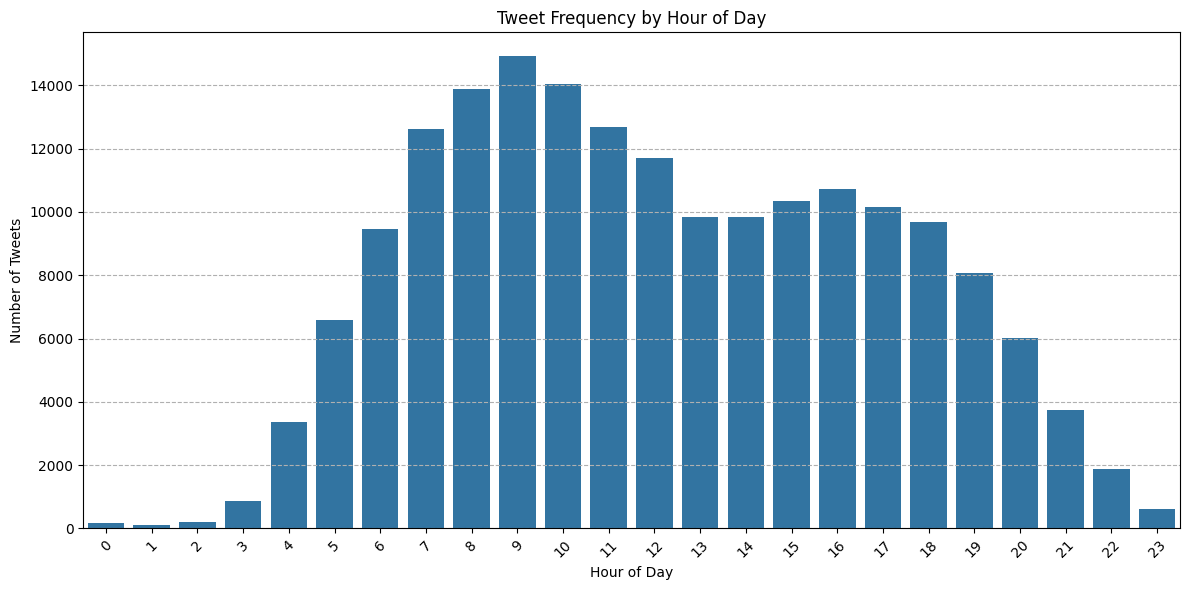

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values)
plt.title('Tweet Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Memo: Justificación de la Micro-campaña

### Análisis Integrado y Estrategia de Micro-campaña

El objetivo de esta micro-campaña es capitalizar los insights obtenidos del análisis de tweets para optimizar la comunicación del partido político. Hemos identificado patrones clave en el sentimiento, los temas y el comportamiento de la audiencia.

**1. Sentimiento y Temas Clave:**

El análisis de sentimiento en `df_filtrada` (`neutral`: 5, `negativo`: 3, `positivo`: 2) y la clasificación de temas (`positivo`, `amarillista`, `otro`) revelan áreas de oportunidad. Aunque la muestra (`df_filtrada`) es pequeña, nos proporciona una base para entender las reacciones iniciales a los tweets. El partido debe enfocarse en amplificar los mensajes `positivos` y `neutrales` para construir una imagen favorable y contrarrestar el `amarillismo` con información veraz y constructiva. Los temas generados por Gemini, aunque abstractos en la `df_filtrada` (e.g., 'positivo', 'amarillista', 'otro'), nos permiten ajustar el tono de los mensajes.

**2. Horarios Óptimos de Publicación:**

La distribución de la frecuencia de tweets por hora (`hourly_counts`) muestra claramente los picos de actividad de nuestra audiencia. Los horarios con mayor número de tweets son principalmente entre las **7 AM y las 11 AM**, y un segundo pico importante entre las **3 PM y las 5 PM**. Esto sugiere que la audiencia está más activa durante estas franjas horarias, lo que las convierte en los momentos ideales para la publicación de contenido para maximizar el alcance y la interacción.

**3. Estrategia de Contenido y Tono:**

Para maximizar el impacto, se propone una estrategia dual:

*   **Mensajes Positivos/Inspiradores**: Publicar tweets con un tono `inspirador` durante las horas pico de la mañana (7-11 AM) para empezar el día con un mensaje constructivo y motivador, aprovechando el inicio de la jornada laboral o de estudio.
*   **Mensajes Informativos/Constructivos (Anti-amarillismo)**: Utilizar un tono `informativo y basado en hechos` durante las horas pico de la tarde (3-5 PM) para abordar o contrarrestar el `amarillismo` o la desinformación que pueda circular, cuando la audiencia tiene mayor disponibilidad para procesar información más detallada. Esto permitirá al partido posicionarse como una fuente de credibilidad.

**4. KPI de Éxito:**

El principal KPI para esta micro-campaña será el **engagement rate**, enfocado en la cantidad de retweets y comentarios positivos. La meta es **aumentar el engagement rate en un 15%** para los tweets publicados durante los horarios y con los tonos recomendados. Adicionalmente, buscaremos una mejora en el **sentimiento neto de las respuestas** a estos tweets en un 10%, indicando una percepción más favorable del partido.

En resumen, la micro-campaña se enfocará en la publicación estratégica de contenido optimizado en función del sentimiento, los temas y los horarios de mayor actividad de la audiencia, con el fin de mejorar la percepción y la interacción con el partido.

Resumen: Preguntas y respuestas

Los mejores momentos para publicar tuits son principalmente entre las 7:00 y las 11:00, con un segundo pico entre las 15:00 y las 17:00, ya que en estas horas se registra la mayor actividad de la audiencia.

Análisis de datos: Hallazgos clave
Se extrajo con éxito la hora del día de la columna "fecha" para su análisis.

El análisis de frecuencia de los tuits reveló dos periodos principales de alta actividad de la audiencia: uno por la mañana (entre las 7:00 y las 11:00) y otro por la tarde (entre las 15:00 y las 17:00).

Según análisis previos (citados en el memorándum), la distribución del sentimiento en un conjunto de datos filtrado fue neutral (5), negativa (3) y positiva (2), con temas clasificados como positivos, amarillistas y otros.

Recomendaciones o próximos pasos

Se propone una estrategia de microcampaña para publicar mensajes positivos/inspiradores durante el pico de la mañana (7:00-11:00) y mensajes informativos/constructivos (sin sensacionalismo) durante el pico de la tarde (15:00-17:00) para maximizar la interacción y contrarrestar la desinformación.

Los indicadores clave de rendimiento (KPI) para la microcampaña incluyen aumentar la tasa de participación en un 15 % y mejorar el sentimiento neto de las respuestas a los tweets en un 10 %.
